# Pasajeros Metrorrey

## **Estadística Aplicada**

**Karen Lorelei Cerda Roiz  1945088**

**Sesión 14-26 marzo 2023**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from statsmodels.tsa.api import seasonal_decompose

In [5]:
metrorrey = pd.read_csv('metrorrey.csv')

In [6]:
metrorrey.head()

,Mes,Pasajeros,Ingresos
0,2008/01,5869.0,16979.0
1,2008/02,6499.0,18516.0
2,2008/03,5801.0,16719.0
3,2008/04,6932.0,17663.0
4,2008/05,6876.0,21079.0


**Siempre que trabajemos con series de tiempo debemos 'declarar' una variable con formato de tiempo y debemos convertirla en el index**

In [7]:
#Convertir a mes en fecha con pandas
# en format es %Y para el año con 4 cifras y %y para año con 2 cifras, y %m para mes con 2 cifras y %d para dias con 2 cifras
metrorrey['Mes'] = pd.to_datetime(metrorrey['Mes'], format='%Y/%m')

In [9]:
metrorrey.head()

,Mes,Pasajeros,Ingresos
0,2008-01-01,5869.0,16979.0
1,2008-02-01,6499.0,18516.0
2,2008-03-01,5801.0,16719.0
3,2008-04-01,6932.0,17663.0
4,2008-05-01,6876.0,21079.0


In [10]:
#Convetir el index en los valores del mes
metrorrey = metrorrey.set_index('Mes')

In [11]:
#Hay que declarar la frecuencia de los datos
#mensuales que es 'montly series = MS'
metrorrey.index.freq = 'MS'

In [12]:
metrorrey.index

DatetimeIndex(['2008-01-01', '2008-02-01', '2008-03-01', '2008-04-01',
               '2008-05-01', '2008-06-01', '2008-07-01', '2008-08-01',
               '2008-09-01', '2008-10-01',
               ...
               '2022-04-01', '2022-05-01', '2022-06-01', '2022-07-01',
               '2022-08-01', '2022-09-01', '2022-10-01', '2022-11-01',
               '2022-12-01', '2023-01-01'],
              dtype='datetime64[ns]', name='Mes', length=181, freq='MS')

**Si el dataframe ya tiene una variable de fecha, una frecuencia y es el index; ya se pueden emplear las herramientas de analisis de series de tiempo**

dataframe.index

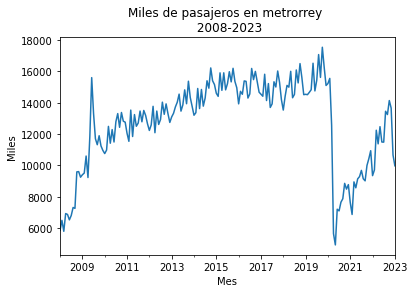

In [14]:
#graficamos
metrorrey['Pasajeros'].plot()
plt.title('Miles de pasajeros en metrorrey \n 2008-2023')
plt.ylabel('Miles')
plt.show()

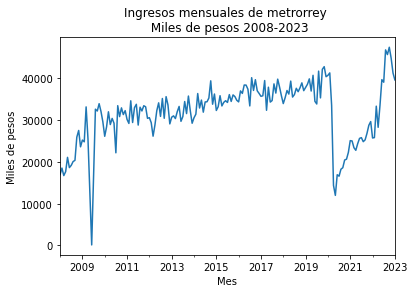

In [15]:
metrorrey['Ingresos'].plot()
plt.title('Ingresos mensuales de metrorrey \n Miles de pesos 2008-2023')
plt.ylabel('Miles de pesos')
plt.show()

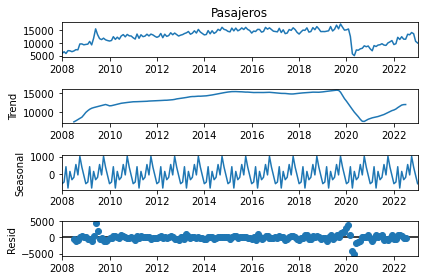

In [17]:
#descomponer los pasajeros en los varios tipos de estilos
serie1 = seasonal_decompose(metrorrey['Pasajeros'], model='ad')
serie1.plot()
plt.show()

In [18]:
#Revisar en que meses hay mas pasajeros en metrorrey
serie1.seasonal.iloc[0:12]

Mes
2008-01-01    -565.338211
2008-02-01    -467.710291
2008-03-01     417.269947
2008-04-01    -815.748883
2008-05-01     145.240614
2008-06-01    -332.910830
2008-07-01    -196.040026
2008-08-01     544.016519
2008-09-01     -56.829133
2008-10-01    1016.647513
2008-11-01     392.821051
2008-12-01     -81.418270
Freq: MS, Name: seasonal, dtype: float64

**Meses con mas pasajeros:**
03,05,08,10,11

marzo, mayo, agosto, noviembre, diciembre


**Meses con menos pasajeros:**
01,02,04,06,07,09,12

enero, febrero, abril, junio, julio, septiempre, diciembre